# MNE-Python: From raw data to epochs and evoked responses (ERF/ERP)

`
Authors:
Annalisa Pascarella
Vanessa Hadid`

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load the mne package


In [2]:
import mne

We set the logging level to 'warning' so the output will be less verbose

In [8]:
mne.set_log_level('warning')

## Download sample dataset

Now we import the [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset) dataset. It will be downloaded automatically (approx. 2 GB)

In [4]:
from mne.datasets import sample
data_path = sample.data_path()

raw_fname = os.path.join(data_path, 'MEG/sample/sample_audvis_filt-0-40_raw.fif')
print(raw_fname)

/home/pasca/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


/usr/lib/python3/dist-packages/paramiko/transport.py:220: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Read data from file

To see what a function does...use this notation!


In [5]:
mne.io.read_raw_fif?

In [6]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
print(raw)

Opening raw data file /home/pasca/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>


Printing the [Raw](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw) object displays some basic information like the total number of channels, the number of time points at which the data were sampled, total duration, and the approximate size in memory. 

Note that by default, the data will actually not be loaded into memory automatically to preserve memory. To actually load the data, we have to pass `preload=True`.

Now let's look at the measurement info. There is also quite a lot of information stored in the `raw.info` attribute.  It will give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.


In [7]:
print(raw.info)

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


`raw.info` is just a dictionary and like Python dictionaries has a `.keys()` method that shows all the available field names

In [10]:
isinstance(raw.info, dict)
print(raw.info.keys())

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])


So we can access its elements this way:

In [11]:
raw.info['sfreq']  # Sampling frequency

150.15374755859375

In [12]:
raw.info['bads']  # list of marked bad channels

['MEG 2443', 'EEG 053']

Looking at the info dict we observe that data were already filtered.

Now, let's see what channels are present in the data. We simply have to take a loot at the `raw.ch_names` attribute.

In [13]:
raw.ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

You can index it as a list

In [14]:
raw.ch_names[42]

'MEG 0432'

In [15]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

Channel type of a specific channel

In [28]:
mne.io.pick.channel_type?

In [29]:
channel_type = mne.io.pick.channel_type(info=raw.info, idx=75)
print('Channel #75 is of type:', channel_type)

channel_type = mne.io.pick.channel_type(info=raw.info, idx=320)
print('Channel #320 is of type:', channel_type)

Channel #75 is of type: grad
Channel #320 is of type: eeg


`raw.info['chs']` contains all the details about the sensors (type, locations, coordinate frame etc.)

In [16]:
len(raw.info['chs'])

376

In [17]:
type(raw.info['chs'])

list

In [18]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 1.0,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [19]:
raw.info['chs'][330]

{'scanno': 331,
 'logno': 16,
 'kind': 2 (FIFFV_EEG_CH),
 'range': 1.0,
 'cal': 0.0001875000016298145,
 'coil_type': 1 (FIFFV_COIL_EEG),
 'loc': array([ 0.06725728,  0.05876905,  0.0723644 ,  0.00235201,  0.11096951,
        -0.03500458,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ]),
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'EEG 016',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}

It is possible to rename channels using the [`rename_channels()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.rename_channels) method

In [20]:
raw.rename_channels({"EOG 061": "blink detector"})

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

To visualize the sensor locations we can use [`plot_sensors()`](https://mne.tools/stable/generated/mne.io.Raw.html#mne.io.Raw.plot_sensors) method.

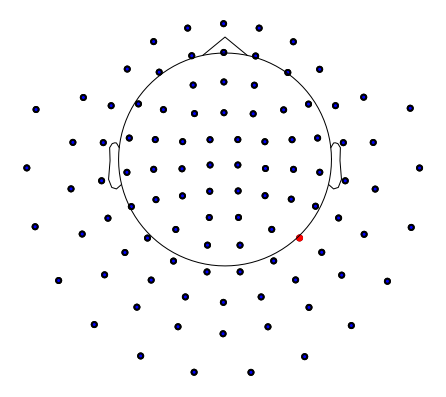

In [22]:
raw.plot_sensors(kind='topomap', ch_type='grad');

The [Working with sensor locations](https://mne.tools/stable/auto_tutorials/intro/40_sensor_locations.html#sphx-glr-auto-tutorials-intro-40-sensor-locations-py) tutorial describes how to read and plot sensor locations, and how MNE-Python handles physical locations of sensors.

# Extracting data from `Raw` objects

To access the data, just use the `[]` syntax as to access any element of a list, dict etc. MNE-Python also returns an array of times (in seconds) corresponding to the requested samples.

In [24]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(376, 10)
(10,)


In [25]:
times

array([0.        , 0.00665984, 0.01331968, 0.01997952, 0.02663936,
       0.0332992 , 0.03995904, 0.04661888, 0.05327872, 0.05993856])

To extract data in a given time window

In [27]:
sampling_freq = raw.info["sfreq"]
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-1.20292928e-11, -9.85012327e-12, -6.24618310e-12,
        -5.81858254e-12, -8.26709172e-12, -9.47390603e-12,
        -8.40260120e-12, -7.93950648e-12, -8.96571088e-12,
        -8.95602112e-12, -7.15093074e-12, -6.00786247e-12,
        -6.54294063e-12, -6.84192232e-12, -5.98871103e-12,
        -5.25860162e-12, -4.93539186e-12, -3.89230469e-12,
        -2.65788192e-12, -3.34004505e-12, -6.19225374e-12,
        -9.04604833e-12, -1.01161679e-11, -9.28920758e-12,
        -7.37394236e-12, -6.03751556e-12, -7.31197351e-12,
        -1.09924238e-11, -1.36405519e-11, -1.24221320e-11,
        -9.01332828e-12, -7.46900280e-12, -9.03368340e-12,
        -1.14004407e-11, -1.23697337e-11, -1.16285216e-11,
        -9.52985206e-12, -7.14492118e-12, -7.11247777e-12,
        -1.09266820e-11, -1.54418731e-11, -1.58643113e-11,
        -1.23587284e-11, -9.66064248e-12, -1.00467018e-11,
        -1.12617940e-11, -1.16725618e-11, -1.23317045e-11,
        -1.31183629e-11, -1.20719410e-11, -9.88306477e-

To get all data you can use the `get_data()` method

In [31]:
data = raw.get_data()
print(data.shape)

(376, 41700)


# Visualizing raw data

Note : we will use the QT backend from matplotlib that will open a separate window.

In [28]:
%matplotlib qt
fig = raw.plot()

Using matplotlib as 2D backend.


In [29]:
fig = raw.copy().pick_types(meg=False, eeg=True).plot()

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


# Filtering

In [32]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)

Opening raw data file /home/pasca/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


In [33]:
raw_beta = raw.copy().filter(l_freq=13, h_freq=30, verbose=True)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 153 samples (1.019 sec)



In [34]:
print(raw_beta.info)  # note the update of raw.info['lowpass'] and raw.info['highpass']

<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 13.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 30.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


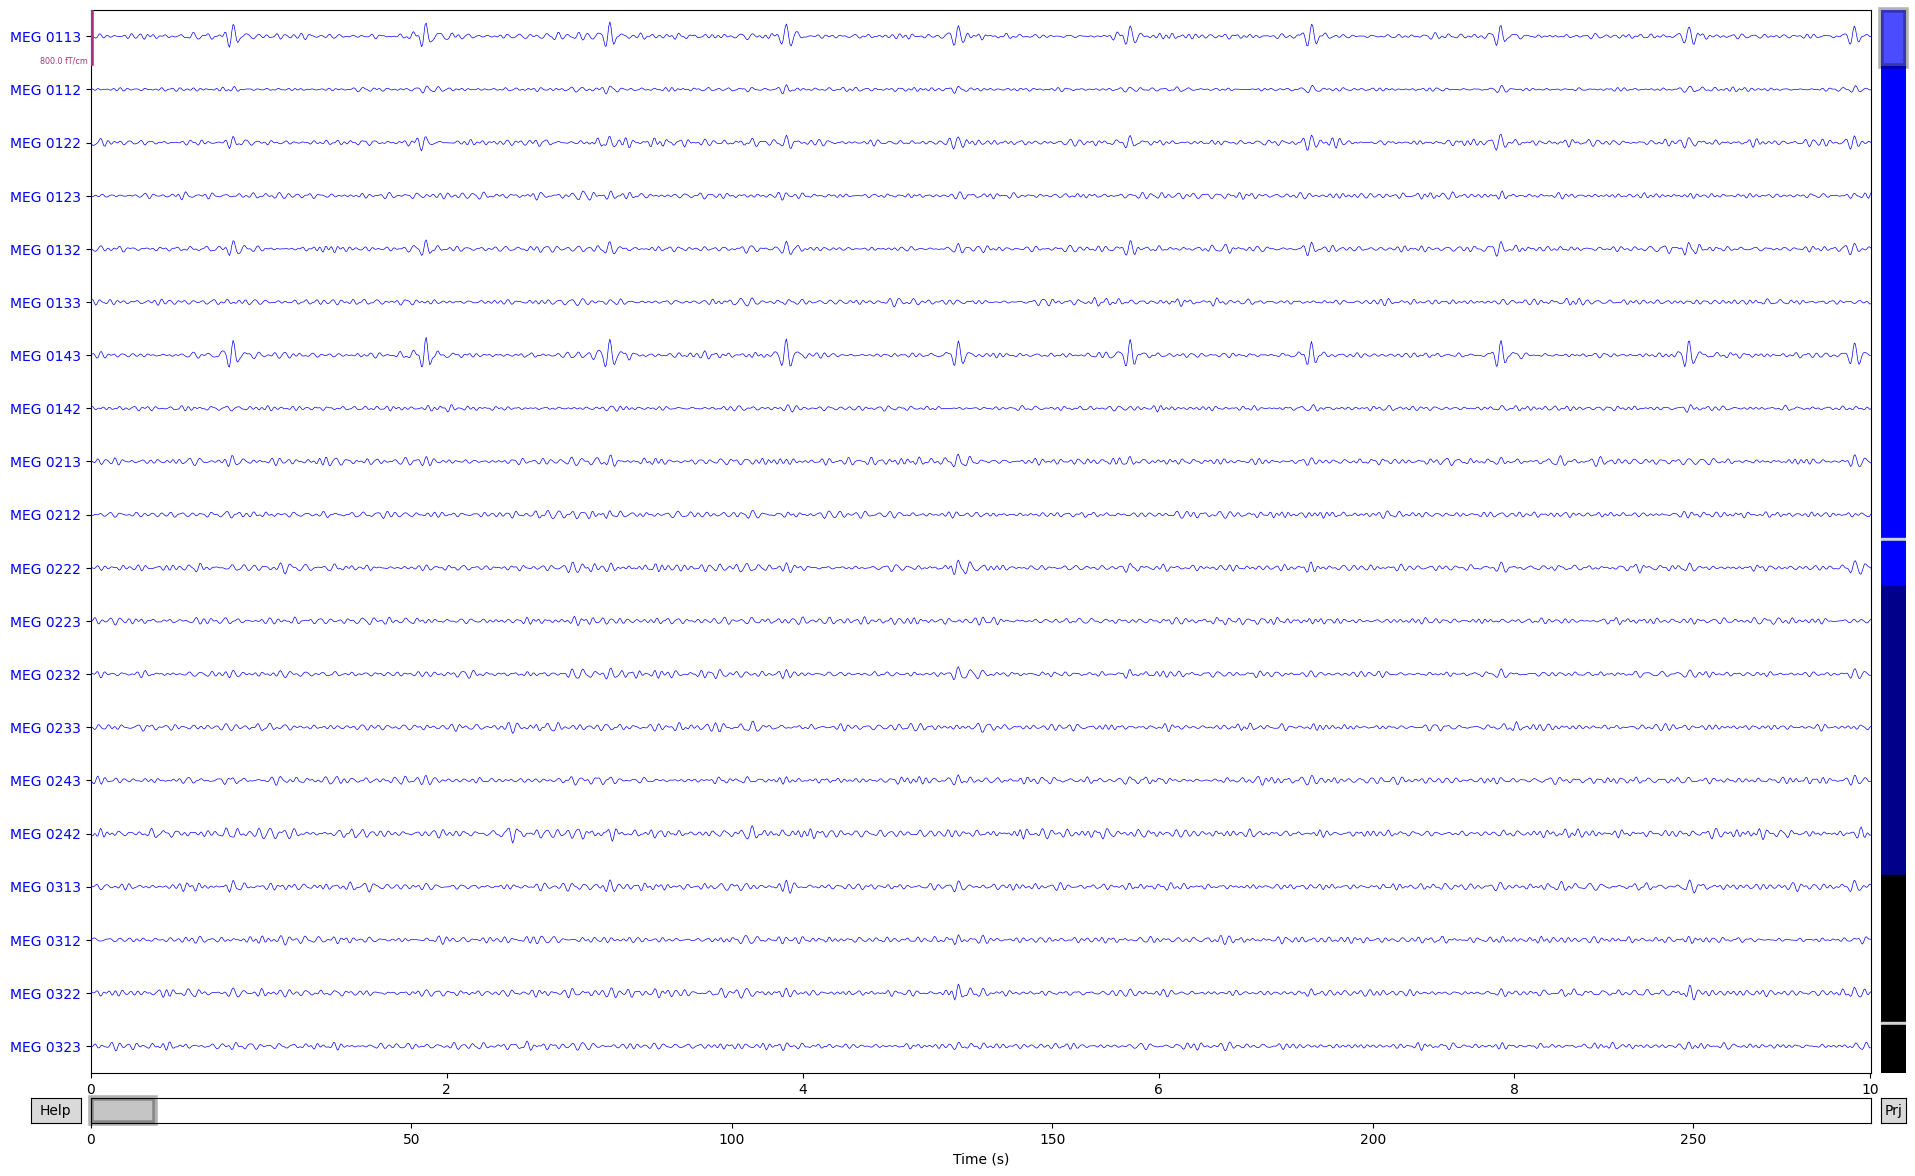

Channels marked as bad: ['MEG 2443', 'EEG 053']


In [35]:
raw_beta.plot()

In [36]:
raw_beta.filter?

## Exercise
Plot the 10 first seconds of the stimutation channel `STI 014` just using matplotlib.

Tips:

- Find the channel index using `raw.ch_names.index('STI 014')`
- Get the data for this channel
- Plot it using `plt.plot`


# Define and read epochs

Let us now see how events are represented and used in MNE

### First, extract events.
The [`sample`](https://mne.tools/stable/documentation/datasets.html#sample-dataset) dataset includes experimental events recorded on stim channel `STI 014`. The events are parsed from this channel using [`mne.find_events()`](https://mne.tools/stable/generated/mne.find_events.html#mne.find_events) method:

In [42]:
events = mne.find_events(raw, stim_channel='STI 014', verbose=True)
print(events.shape)
print(type(events))

319 events found
Event IDs: [ 1  2  3  4  5 32]
(319, 3)
<class 'numpy.ndarray'>


LA - 1 - Response to left-ear auditory stimulus

RA - 2 - Response to right-ear auditory stimulus

LV - 3 - Response to left visual field stimulus

RV - 4 - Response to right visual field stimulus 

smiley - 5 - Response to the smiley face

button - 32 - Response triggered by the button press

In [43]:
print(events[:5])  # events is a 2d array, (time, previous, trigger)

[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]


In [44]:
len(events[events[:, 2] == 4])

70

In [83]:
len(events)

319

## Plot events

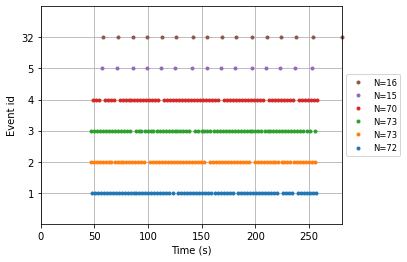

In [84]:
%matplotlib inline
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'])

We can create an event Python dictionary to keep track of which Event ID corresponds to which experimental condition. The dictionary will be used to extract epochs from continuous data. The dictionary keys can contain `/` for grouping of sub-conditions. For example, if we want to pool all auditory trials, instead of merging Event IDs 1 and 2 using the `merge_events()` function, we can request for 'auditory' to select all epochs with Event IDs 1 and 2; requesting 'left' trials will select all epochs with Event IDs 1 and 3. 


/tmp/ipykernel_92116/123250963.py:4: RuntimeWarning: event 5 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)
/tmp/ipykernel_92116/123250963.py:4: RuntimeWarning: event 32 missing from event_id will be ignored
  fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)


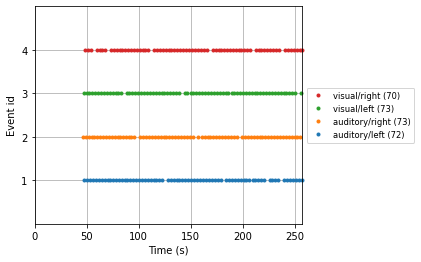

In [85]:
event_id = {"visual/left": 3, "visual/right": 4,
            "auditory/left": 1, "auditory/right": 2}

fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], event_id=event_id)

The events can be visualized together with the raw data:

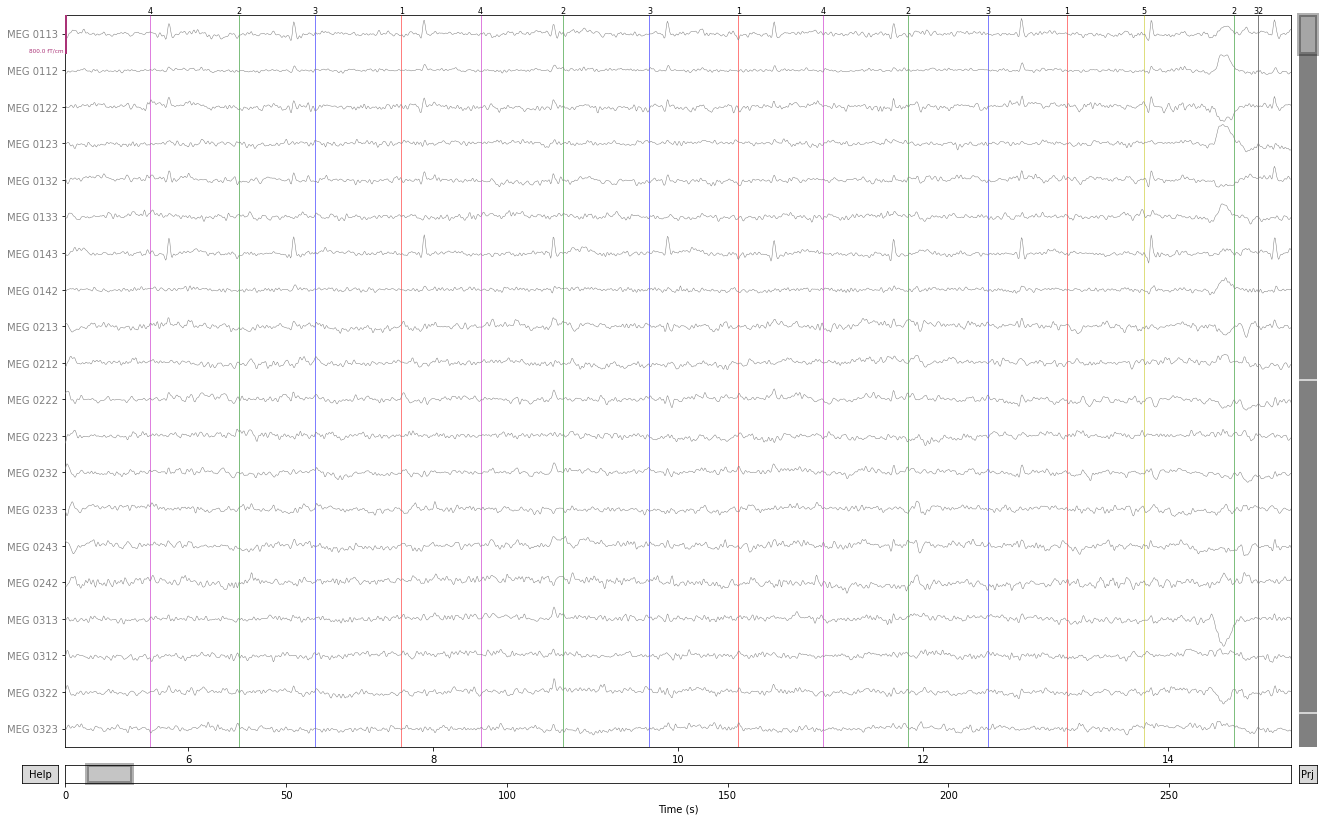

In [89]:
raw.plot(
    events=events,
    start=5,
    duration=10,
    color="gray",
    event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"},
);

### Create epochs

First, define parameters: start, stop, and baseline period of the epochs.

In [90]:
tmin = -0.2  # start of each epoch (200ms before the trigger)
tmax = 0.5   # end of each epoch (500ms after the trigger)
baseline = (None, 0)  # from the first time instant to the trigger pulse

Define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers, and EOG:

In [101]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

In [102]:
# we are picky again, this time we select MEG and EOG channels
picks_meg = mne.pick_types(raw.info, meg=True, eeg=False, eog=True,
                           stim=False, exclude='bads')

Extract epochs:

In [103]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks_meg, baseline=baseline,
                    reject=reject)

Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
4 projection items activated


In [104]:
print(epochs)

<Epochs |  288 events (good & bad), -0.199795 - 0.499488 sec, baseline -0.199795 – 0 sec, ~3.2 MB, data not loaded,
 'auditory/left': 72
 'auditory/right': 73
 'visual/left': 73
 'visual/right': 70>


Remove bad epochs based on the `reject` parameter we passed to `Epochs`.

In [105]:
epochs.drop_bad()

Loading data for 288 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based

Number of events,239
Events,auditory/left: 55auditory/right: 61visual/left: 67visual/right: 56
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


See how epochs were dropped

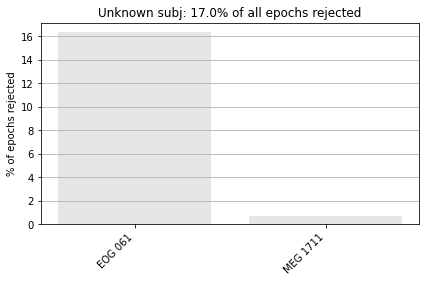

In [55]:
fig = epochs.plot_drop_log()

### Visualization Epochs

See [this page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) for options on how to visualize epochs.

Here is just an illustration to make a so-called ERP/ERF image:

Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


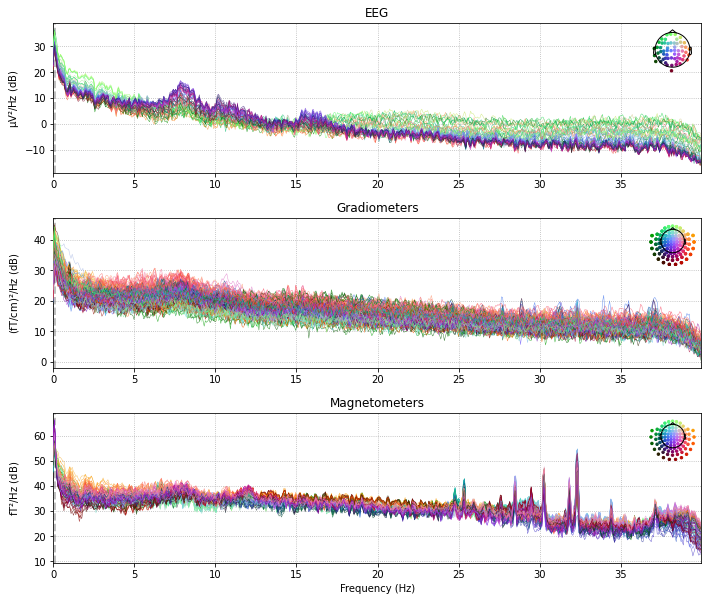

In [56]:
fig = raw.plot_psd(fmax=40)

Loading data for 239 events and 106 original time points ...
Not setting metadata
Not setting metadata
239 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
239 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"
combining channels using "gfp"


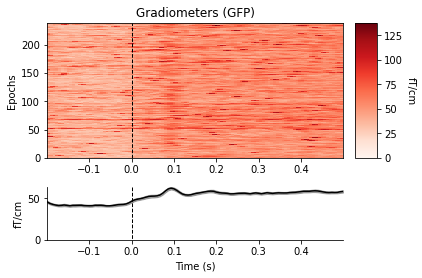

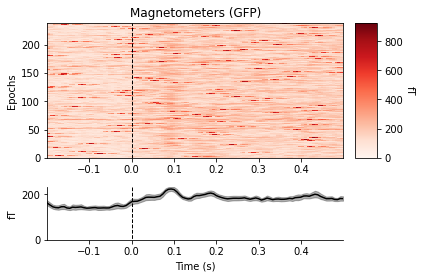

In [57]:
figs = epochs.plot_image()

In [58]:
%matplotlib qt
fig = epochs.plot()

Loading data for 239 events and 106 original time points ...
Loading data for 20 events and 106 original time points ...


### Average the epochs to get the evoked response (ERF/ERP), and plot it!

In [59]:
evoked = epochs.average()
print(evoked)

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
<Evoked | '0.28 × visual/left + 0.23 × visual/right + 0.23 × auditory/left + 0.26 × auditory/right' (average, N=239), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 305 ch, ~3.4 MB>


Dropped 0 epochs: 
Channels marked as bad: none


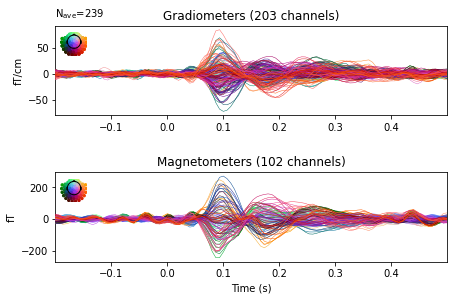

In [60]:
%matplotlib inline
fig = evoked.plot(spatial_colors=True)

This created an average across **all** conditions. Let's now estimate evoked responses for **individual** conditions.

In [61]:
print(event_id)

{'visual/left': 3, 'visual/right': 4, 'auditory/left': 1, 'auditory/right': 2}


Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


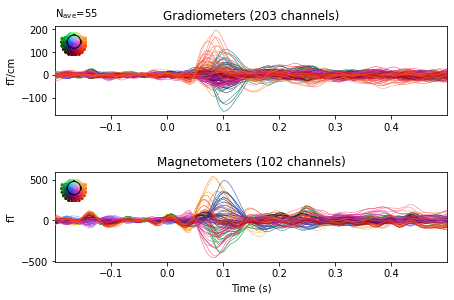

In [62]:
fig = epochs['auditory/left'].average().plot(spatial_colors=True)

## Accessing and indexing epochs by condition

Epochs can be indexed by integers or slices to select a subset of epochs but also with strings to select by conditions `epochs[condition]`

Remember `/` serves as a grouping operator. To calculate the evoked response across **all** "left" stimulations, do the following:

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


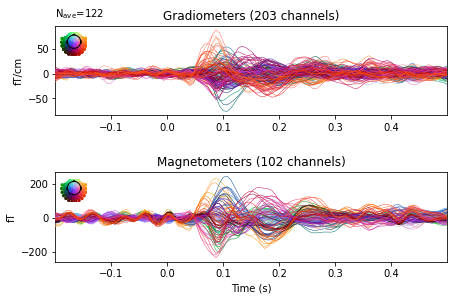

In [63]:
fig = epochs['left'].average().plot(spatial_colors=True);  # note the legend

In [64]:
# remember ...
event_id

{'visual/left': 3, 'visual/right': 4, 'auditory/left': 1, 'auditory/right': 2}

In [65]:
epochs[0]  # first epoch

Number of events,1
Events,visual/left: 1
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [66]:
epochs[:10]  # first 10 epochs

Number of events,10
Events,auditory/left: 3auditory/right: 2visual/left: 3visual/right: 2
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [67]:
epochs['visual/left']  # epochs for the left visual condition

Number of events,67
Events,visual/left: 67
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In event_id, `/` selects conditions in a hierarchical way, e.g. here, "auditory" vs. "visual", "left" vs. "right", and MNE can select them individually.

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


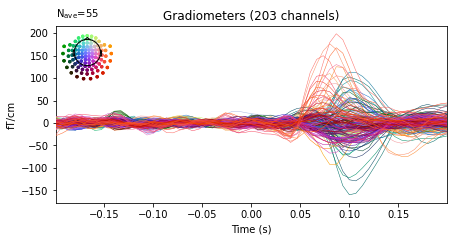

In [68]:
evoked_auditory_left = epochs['auditory/left'].average().pick_types(meg='grad')
evoked_auditory_left.crop(None, 0.2) # Beginning of evoked until 0.2s after stimulus onset.
fig = evoked_auditory_left.plot(spatial_colors=True)

In [69]:
epochs['visual']  # epochs for the visual condition (either left or right)

Number of events,123
Events,visual/left: 67visual/right: 56
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


In [70]:
epochs['left']

Number of events,122
Events,auditory/left: 55visual/left: 67
Time range,-0.200 – 0.499 sec
Baseline,-0.200 – 0.000 sec


To access the data of some epochs use the `get_data` method.


In [71]:
epochs_data = epochs.get_data()
type(epochs_data), epochs_data.shape

Loading data for 239 events and 106 original time points ...


(numpy.ndarray, (239, 306, 106))

`epochs_data` is a 3D array of dimension (239 epochs, 306 channels, 106 time instants).


## Visualize Topographies

First, let's plot an illustration of the sensor locations on the scalp

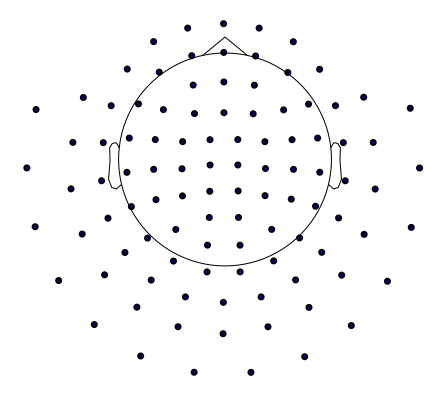

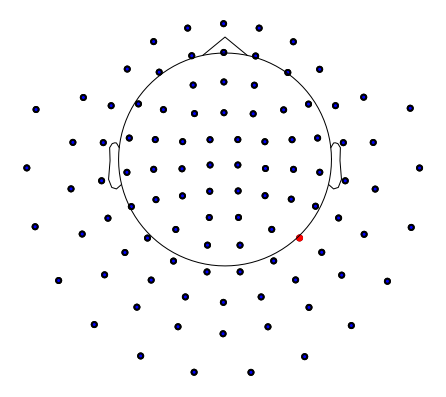

In [72]:
fig = raw.plot_sensors(ch_type='mag')
fig = raw.plot_sensors(ch_type='grad')

Now, let's plot the scalp topography at different time points. These topography plots called `topomap` in the MNE jargon.


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


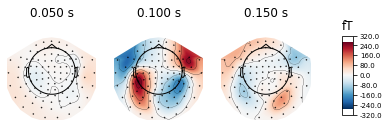

In [73]:
fig = evoked.plot_topomap(ch_type='mag', times=[0.05, 0.1, 0.15])

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


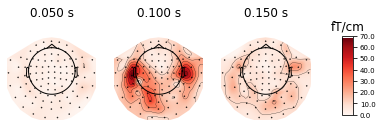

In [74]:
fig = evoked.plot_topomap(ch_type='grad', times=[0.05, 0.1, 0.15])

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/pytho

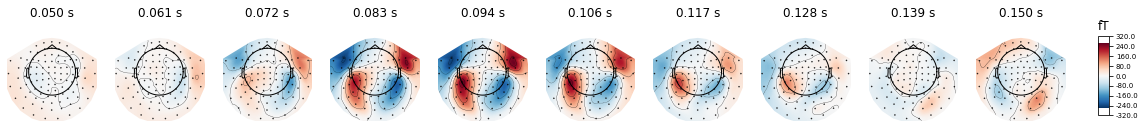

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/pytho

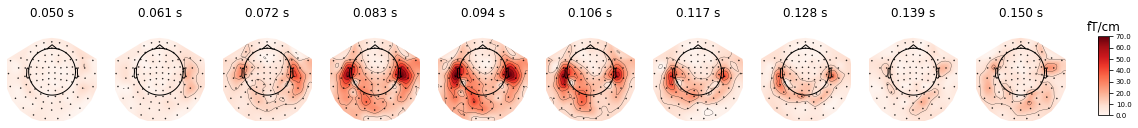

In [75]:
import numpy as np


times = np.linspace(0.05, 0.15, 10)

for ch_type in ('mag', 'grad'):
    fig = evoked.plot_topomap(times=times, ch_type=ch_type)

Topoplot and time series can also be shown in one single "joint" plot. By default, MNE will plot the topographies at the peaks of the time series signal.

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


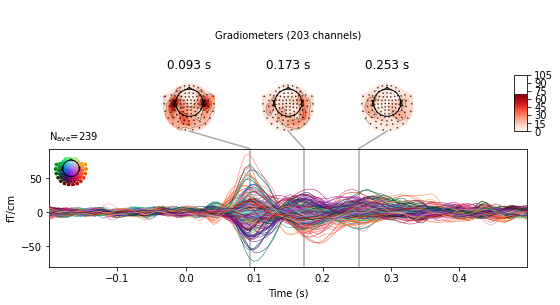

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


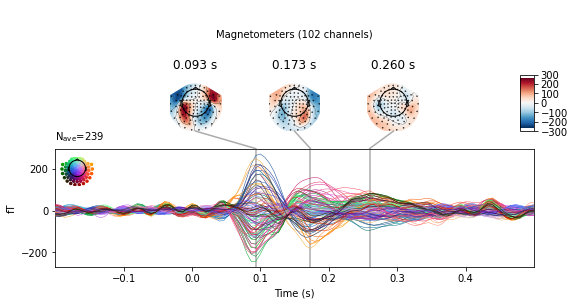

In [76]:
figs = evoked.plot_joint()

But of course, you can also specify custom time points for the topomaps.

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


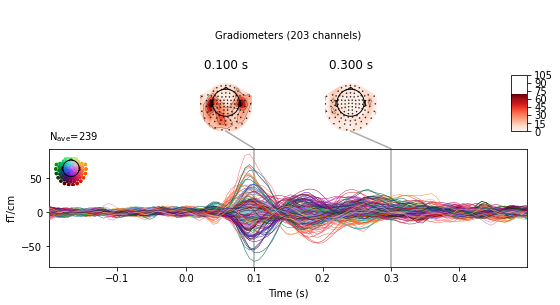

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


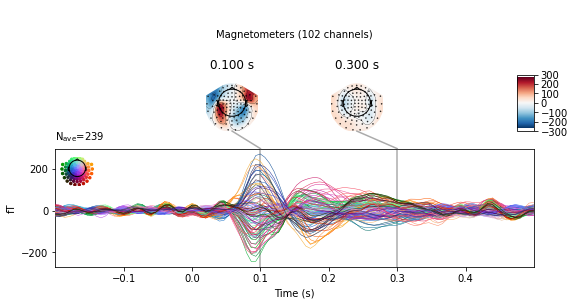

In [77]:
figs = evoked.plot_joint(times=[0.1, 0.3])

Let's visualize topomaps for all experimental conditions.

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


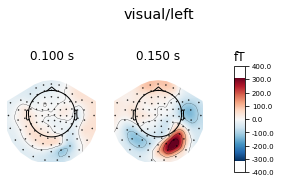

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


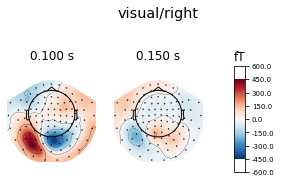

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


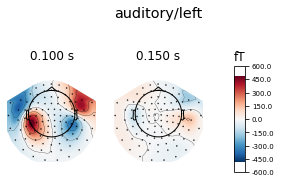

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


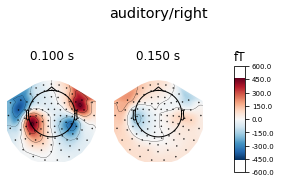

In [78]:
for condition in event_id:
    fig = epochs[condition].average().plot_topomap(times=[0.1, 0.15], title=condition)

### Compute a contrast:

In [79]:
evoked1 = epochs['left'].average()
evoked2 = epochs['right'].average()

contrast = mne.combine_evoked([evoked1, evoked2], weights=[1, -1])

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


Note that this combines evokeds taking into account the number of averaged epochs (to scale the noise variance)

In [80]:
print(evoked1.nave)  # average of 55 epochs
print(contrast.nave)  # average of 116 epochs

122
59.72384937238494


In [81]:
print(contrast)

<Evoked | '(0.55 × visual/left + 0.45 × auditory/left) - (0.48 × visual/right + 0.52 × auditory/right)' (average, N=59.72384937238494), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 305 ch, ~3.4 MB>


Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


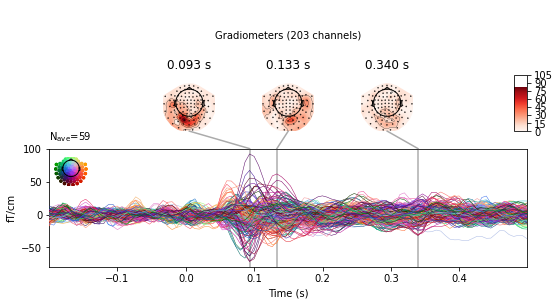

/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/home/pasca/.local/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


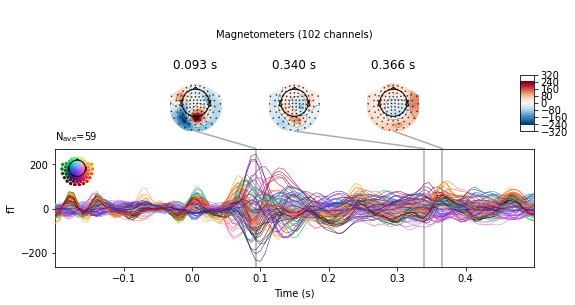

In [82]:
fig = contrast.plot_joint()

### EXERCISE
- Extract Epochs restricted to magnetometers on unfiltered data (`sample_audvis_raw.fif`)
- Construct epochs with a whole-epoch baseline. Then, high-pass filter raw data with a 1 Hz cutoff, construct epochs from that. Compare the resulting Evokeds (filter vs. baseline)
- Plot the difference between all *visual* and all *auditory* stimulus presentations
- Recompute everything for EEG

<div class="alert alert-block alert-info">
<b>Note:</b> For more details look at <a href="https://mne.tools/stable/auto_tutorials/raw/index.html" target="_blank">Working with continuous data tutorial</a> 
</div>
